In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


MODEL USING VGG16 AND LSTM

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add
from google.colab import files

In [ ]:
BASE_DIR = '/content/drive/MyDrive'
WORKING_DIR = '/content/drive/MyDrive'

In [ ]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553467096/553467096 [==============================] - 17s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

RESIZING AND SAVING THE FEATURE OF THE IMAGE

In [ ]:
from PIL import Image
import os
from tensorflow.keras.applications.vgg16 import preprocess_input
from tqdm import tqdm  # Assuming you have tqdm for the progress bar

folder_path = '/content/drive/MyDrive/images'

def resize_images_and_extract_features(folder_path):
    """Resizes and flips all images in a folder to 224x224 pixels.
    Extracts features from images using a pre-trained model.

    Args:
        folder_path (str): Path to the folder containing the images.
    Yields:
        tuple: Tuple containing image ID and corresponding features.
    """
    for filename in tqdm(os.listdir(folder_path)):
        if filename.lower().endswith(('.jpg', '.dcm', '.png')):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)

            # Resize the image
            resized_image = image.resize((224, 224))

            # Save the resized and flipped image in the same folder
            resized_image.save(image_path)

            # Extract features from the resized image
            image = load_img(image_path, target_size=(224, 224))
            image_array = img_to_array(image)
            image_array = image_array.reshape((1, image_array.shape[0], image_array.shape[1], image_array.shape[2]))
            image_array = preprocess_input(image_array)

            # Extract features (replace 'model' with your pre-trained model)
            feature = model.predict(image_array, verbose=0)

            # Get image ID
            image_id = filename.split('.')[0]

            # Yield image ID and features
            yield image_id, feature

# Assuming 'model' is your pre-trained model, make sure to load it before running the functions
# model = load_pretrained_model()  # Replace with actual loading code

# Iterate over features using yield
features = {}
for image_id, feature in resize_images_and_extract_features(folder_path):
    # Store features in the dictionary
    features[image_id] = feature

# Process the features dictionary as needed
print(features)


100%|██████████| 3377/3377 [07:30<00:00,  7.50it/s]


{'image1913': array([[0.        , 0.        , 1.4420207 , ..., 0.33386794, 0.        ,
        2.2552524 ]], dtype=float32), 'image1917': array([[0.        , 0.        , 1.9023811 , ..., 2.2576194 , 0.        ,
        0.14222479]], dtype=float32), 'image1915': array([[0.       , 0.       , 0.6353445, ..., 2.521878 , 0.       ,
        1.1871471]], dtype=float32), 'image1918': array([[0.        , 0.        , 0.00611436, ..., 0.7392355 , 0.        ,
        2.6141257 ]], dtype=float32), 'image1920': array([[0.       , 0.       , 0.9777198, ..., 0.       , 0.       ,
        3.5518596]], dtype=float32), 'image1921': array([[0.       , 0.       , 1.3376961, ..., 1.1317474, 0.       ,
        1.4413967]], dtype=float32), 'image192': array([[0.47417188, 0.        , 0.16498011, ..., 0.05105639, 0.        ,
        1.8332348 ]], dtype=float32), 'image1925': array([[0.       , 0.       , 1.4836814, ..., 0.7850101, 0.       ,
        1.5901703]], dtype=float32), 'image1927': array([[0.        ,

PICKLE FILE


In [ ]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features_png2.pkl'), 'wb'))

In [ ]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features_png2.pkl'), 'rb') as f:
    features = pickle.load(f)

In [ ]:
print(features)

{'image1913': array([[0.        , 0.        , 1.4420207 , ..., 0.33386794, 0.        ,
        2.2552524 ]], dtype=float32), 'image1917': array([[0.        , 0.        , 1.9023811 , ..., 2.2576194 , 0.        ,
        0.14222479]], dtype=float32), 'image1915': array([[0.       , 0.       , 0.6353445, ..., 2.521878 , 0.       ,
        1.1871471]], dtype=float32), 'image1918': array([[0.        , 0.        , 0.00611436, ..., 0.7392355 , 0.        ,
        2.6141257 ]], dtype=float32), 'image1920': array([[0.       , 0.       , 0.9777198, ..., 0.       , 0.       ,
        3.5518596]], dtype=float32), 'image1921': array([[0.       , 0.       , 1.3376961, ..., 1.1317474, 0.       ,
        1.4413967]], dtype=float32), 'image192': array([[0.47417188, 0.        , 0.16498011, ..., 0.05105639, 0.        ,
        1.8332348 ]], dtype=float32), 'image1925': array([[0.       , 0.       , 1.4836814, ..., 0.7850101, 0.       ,
        1.5901703]], dtype=float32), 'image1927': array([[0.        ,

CAPTION


In [ ]:
with open(os.path.join( '/content/drive/MyDrive/qwer.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/3377 [00:00<?, ?it/s]

In [ ]:
len(mapping)

3376

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc.,
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
# before preprocess of text
mapping['image600']

['Lungs clear  no pneumonia.']

In [ ]:
# preprocess the text
clean(mapping)

In [ ]:
# after preprocess of text
mapping['image60']

['startseq interval increase in diffuse bilateral parenchymal opacities which may besecondary to edema infection or with ards. endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:

len(all_captions)

3376

In [ ]:

all_captions[:10]

['startseq moderate to large right pleural effusion has increased since .nopneumothorax.atelectasis at the left base in the left upper lobe have notimproved since .heart size indeterminate.right subclavian infusioncatheter ends in the region of the superior cavoatrial junction.nopneumothorax.severe thoracolumbar scoliosis alters the thoracic anatomy. endseq',
 'startseq low lung volumes.mild bibasilar atelectasis. endseq',
 'startseq no acute cardiopulmonary process. endseq',
 'startseq ng tube tip is in the proximal stomach. right picc line tip is at thecavoatrial junction. cardiomediastinal silhouette is unchanged.there is interval progression of left basal opacity concerning for left lowerlobe pneumonia. small amount of left pleural effusion cannot be excluded.there is no pneumothorax. endseq',
 'startseq in comparison with the study of the monitoring and supportdevices have been removed except for the right subclavian catheter thatextends to the mid portion of the svc.the patient h

In [ ]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

6103

In [ ]:
# get maximum length of the caption available
max_length = max(len(caption.split()) for caption in all_captions)
max_length

151

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()

                n = 0

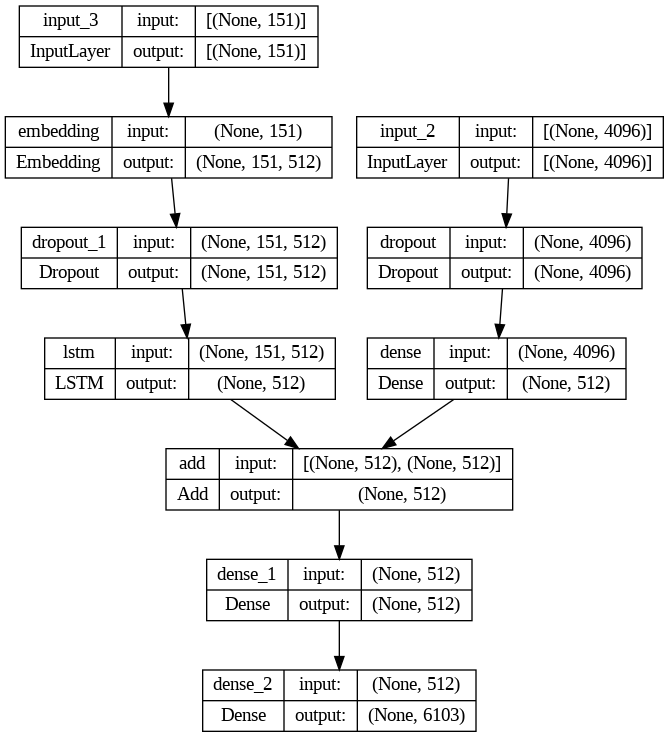

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(512, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 512, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(512)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(512, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
import tensorflow as tf

# Specify the path to the SavedModel directory
model_path = '/content/drive/MyDrive/modelpng3.h5'

# Load the model
model = tf.keras.models.load_model(model_path)

# Now, you can use the loaded_model for predictions


In [ ]:
mode

Epoch 1/50
189/189 - 114s - loss: 5.8263 - 114s/epoch - 602ms/step
Epoch 2/50
189/189 - 101s - loss: 4.2803 - 101s/epoch - 537ms/step
Epoch 3/50
189/189 - 98s - loss: 3.4696 - 98s/epoch - 518ms/step
Epoch 4/50
189/189 - 98s - loss: 2.9929 - 98s/epoch - 518ms/step
Epoch 5/50
189/189 - 97s - loss: 2.6446 - 97s/epoch - 512ms/step
Epoch 6/50
189/189 - 97s - loss: 2.3807 - 97s/epoch - 514ms/step
Epoch 7/50
189/189 - 98s - loss: 2.1637 - 98s/epoch - 520ms/step
Epoch 8/50
189/189 - 97s - loss: 1.9635 - 97s/epoch - 511ms/step
Epoch 9/50
189/189 - 98s - loss: 1.7711 - 98s/epoch - 517ms/step
Epoch 10/50
189/189 - 98s - loss: 1.6002 - 98s/epoch - 517ms/step
Epoch 11/50
189/189 - 96s - loss: 1.4543 - 96s/epoch - 508ms/step
Epoch 12/50
189/189 - 96s - loss: 1.3095 - 96s/epoch - 508ms/step
Epoch 13/50
189/189 - 98s - loss: 1.1764 - 98s/epoch - 517ms/step
Epoch 14/50
189/189 - 96s - loss: 1.0462 - 96s/epoch - 506ms/step
Epoch 15/50
189/189 - 97s - loss: 0.9295 - 97s/epoch - 512ms/step
Epoch 16/50
189

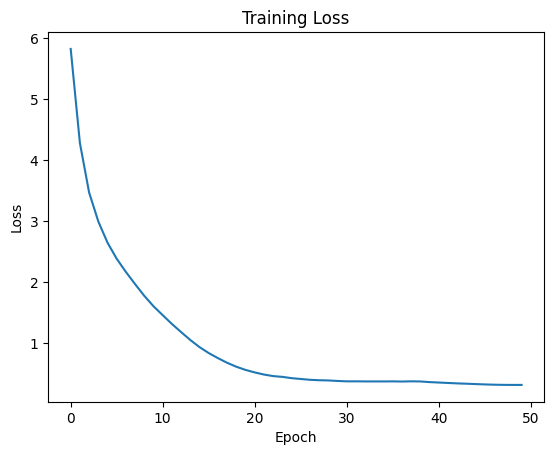

In [ ]:
import matplotlib.pyplot as plt

# train the model
epochs = 50
batch_size = 16
steps = len(train) // batch_size

# create data generator
generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)

# fit for one epoch
history = model.fit(generator, epochs=epochs, steps_per_epoch=steps, verbose=2)

# Plot the training loss graph
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
# save the model
model.save(WORKING_DIR+'/modelpng5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break

    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)



  0%|          | 0/338 [00:00<?, ?it/s]

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 1 of layer "model_5" is incompatible with the layer: expected shape=(None, 153), found shape=(None, 151)


In [ ]:

# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
print("BLEU-3: %f" % corpus_bleu(actual, predicted, weights=(1/3, 1/3, 1/3, 0)))
print("BLEU-4: %f" % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

BLEU-1: 0.164502
BLEU-2: 0.050752
BLEU-3: 0.023114
BLEU-4: 0.012414
